In [46]:
# car price predict project

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
df = pd.read_csv('sample_data/quikr_car.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [49]:
df.shape

(892, 6)

In [50]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [51]:
# keep first 3 word name and remove others
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [52]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [53]:
# removing company I, Commercial, selling, URGENT, Used, Sale, very, i, 2012, well, all, 7, 9, scratch, urgent, sell, Any
valid_companies = [
    'Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
    'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
    'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Fiat', 'Mercedes', 'Jaguar',
    'Jeep', 'Volvo', 'Land Rover'
]
df = df[df['company'].isin(valid_companies)]
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Fiat', 'Mercedes', 'Jaguar',
       'Jeep', 'Volvo'], dtype=object)

In [54]:
# checking year
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '150k', '2003', '2004', '/-Rs', 'sale', '1995', 'ara)', '2002',
       '2001', 'odel', '2 bs', 'Eon', 'emi', 'car', 'digo', 'e...',
       'd...', 'o...', 'cent', 'cab'], dtype=object)

In [55]:
# kepp only integer year
df = df[df['year'].str.isnumeric()]
df['year'] = df['year'].astype(int)
df['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [56]:
# keep only int price
df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].str.replace(',','').astype(int)

In [57]:
# kms_driven extract int value
df['kms_driven'] = df['kms_driven'].str.split().str.get(0).str.replace(',', '')
df = df[df['kms_driven'].str.isnumeric()]
df['kms_driven'] = df['kms_driven'].astype(int)

In [58]:
# extract wanted fuel_type
df = df[~df['fuel_type'].isna()]

In [59]:
# reset index
df = df.reset_index(drop=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        808 non-null    object
 1   company     808 non-null    object
 2   year        808 non-null    int64 
 3   Price       808 non-null    int64 
 4   kms_driven  808 non-null    int64 
 5   fuel_type   808 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.0+ KB


In [61]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,808,808,808.000000,8.080000e+02,808.000000,808
unique,250,22,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,427
mean,NaN,NaN,2012.481436,4.092346e+05,46187.170792,NaN
std,NaN,NaN,3.929951,4.732407e+05,33762.485547,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.899990e+05,56818.500000,NaN


In [62]:
# remove outlier
df = df[df['Price'] < 6e6].reset_index(drop=True)

In [63]:
# doing explorotary data analysis

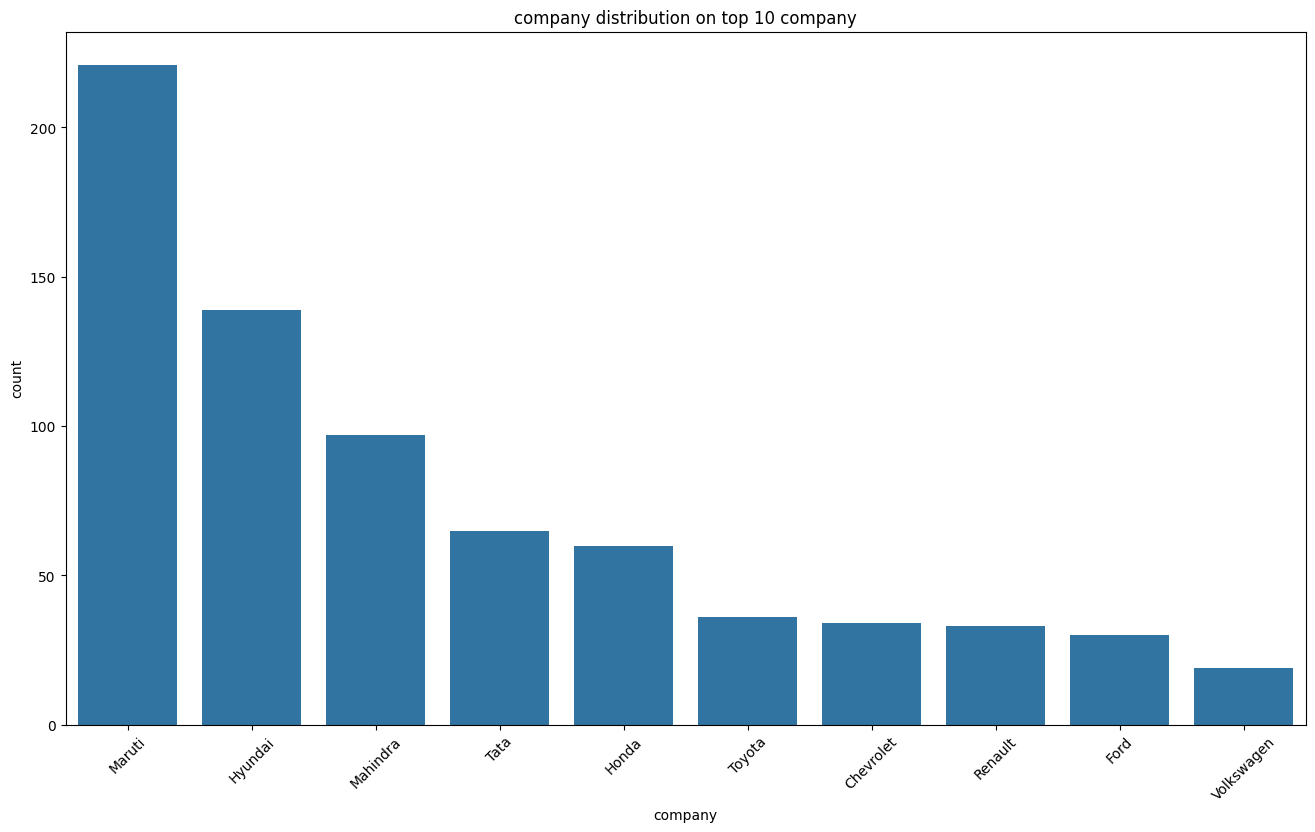

In [64]:
# company distribution on top 10 company
plt.title('company distribution on top 10 company')
sns.barplot(x=df['company'].value_counts()[:10].index, y=df['company'].value_counts()[:10].values)
plt.xlabel('company')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

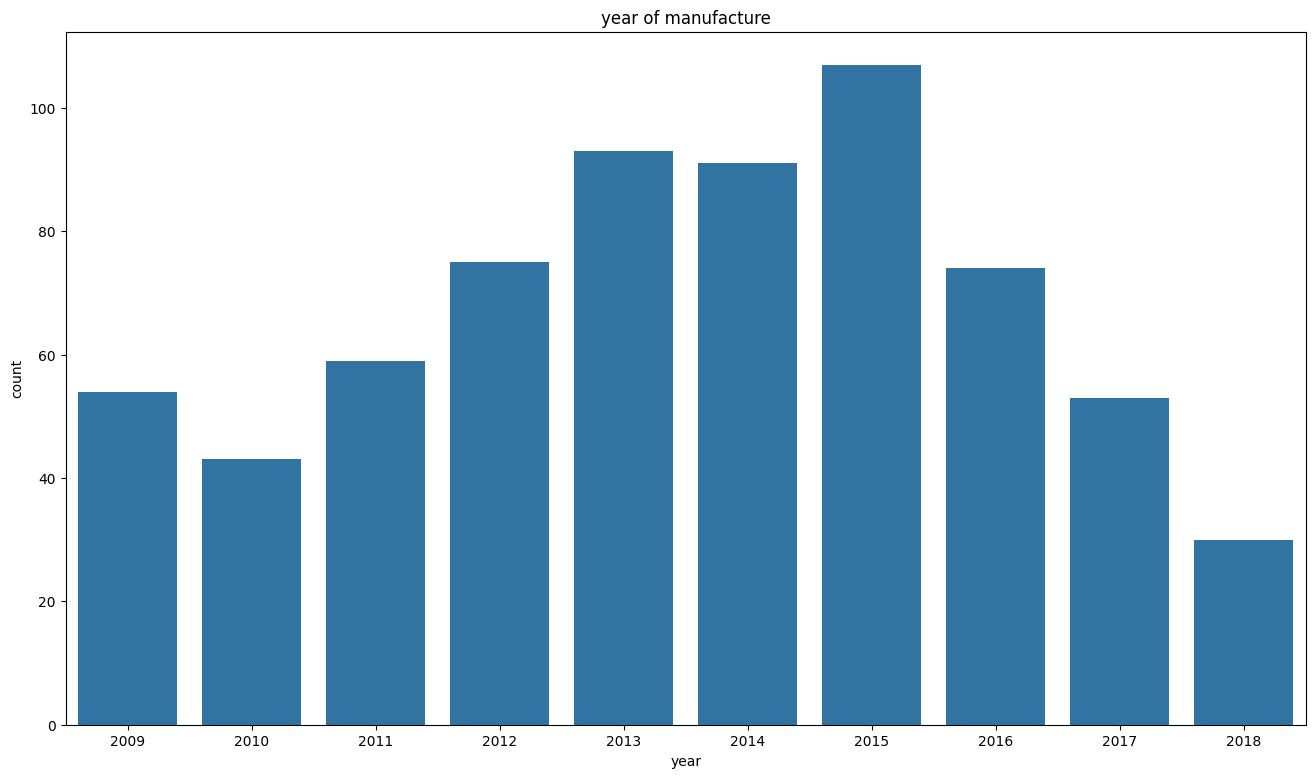

In [65]:
# year of manufacture
plt.title('year of manufacture')
sns.barplot(x=df['year'].value_counts()[:10].index, y=df['year'].value_counts()[:10].values)
plt.xlabel('year')
plt.ylabel('count')
plt.show()

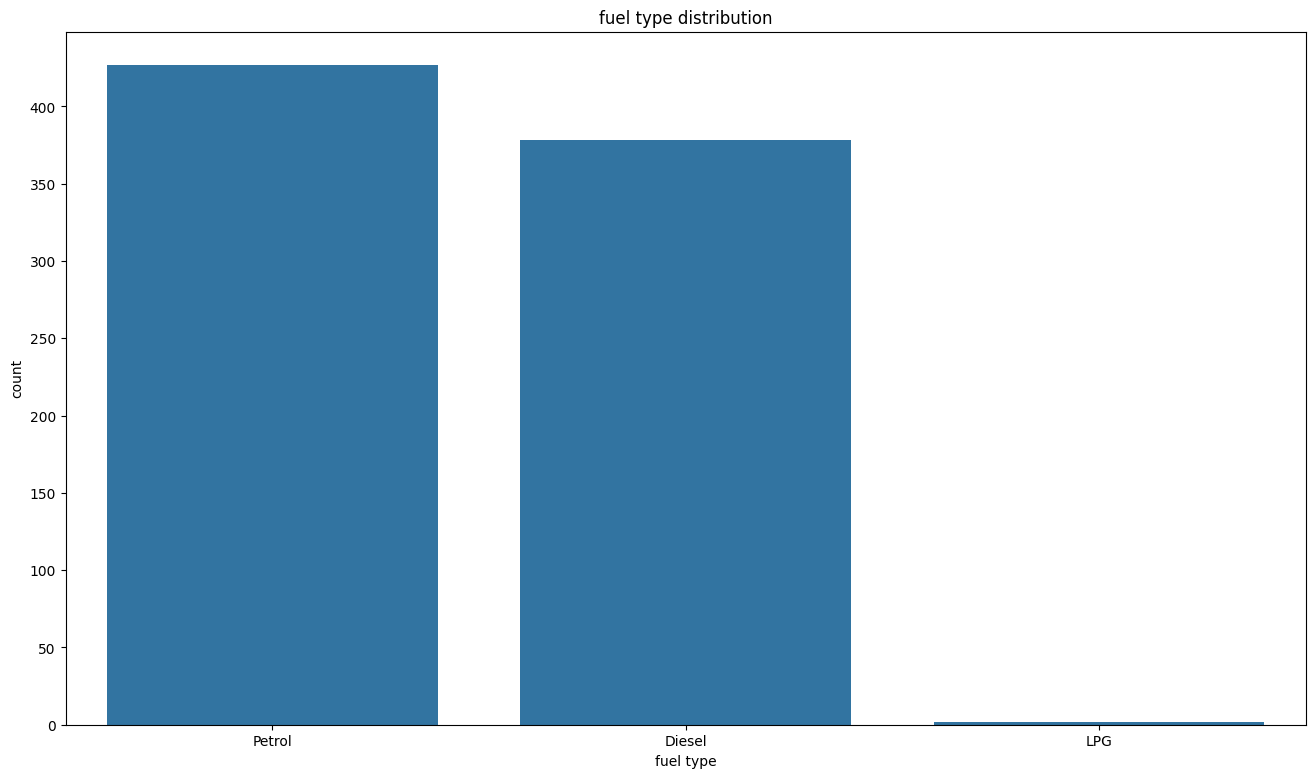

In [66]:
# fuel type distribution
plt.title('fuel type distribution')
sns.barplot(x=df['fuel_type'].value_counts().index, y=df['fuel_type'].value_counts().values)
plt.xlabel('fuel type')
plt.ylabel('count')
plt.show()

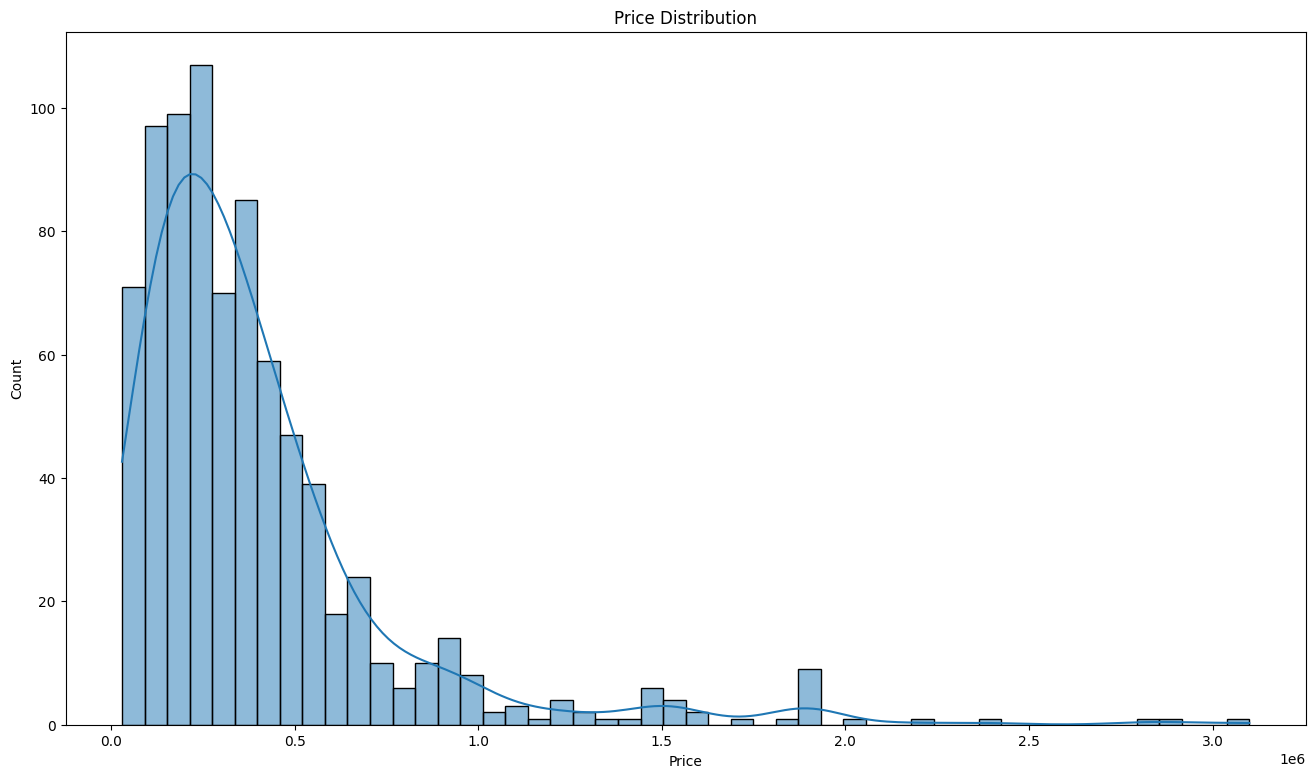

In [67]:
# Price distribution
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

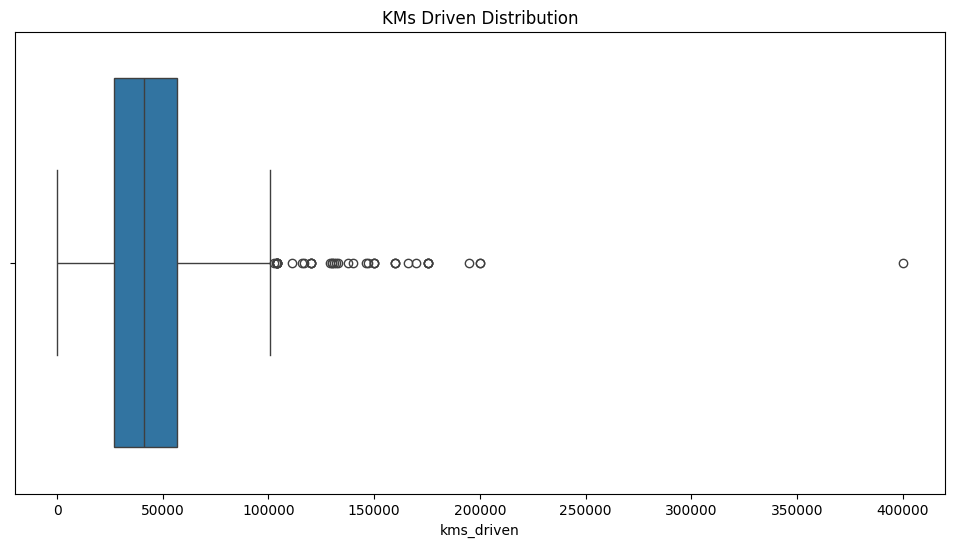

In [68]:
# kms driven distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['kms_driven'])
plt.title("KMs Driven Distribution")
plt.show()

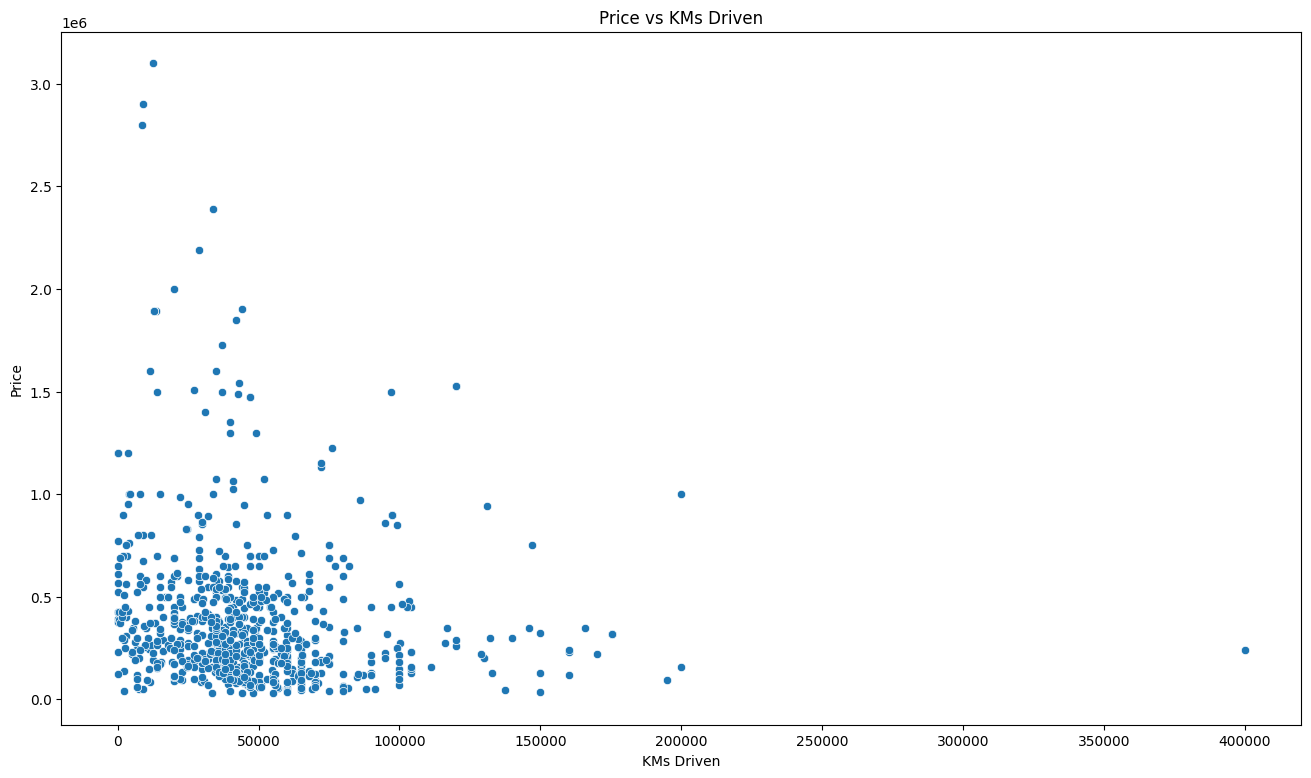

In [69]:
# price with kms_driven relationship
sns.scatterplot(x=df['kms_driven'], y=df['Price'])
plt.title("Price vs KMs Driven")
plt.xlabel("KMs Driven")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'Price')

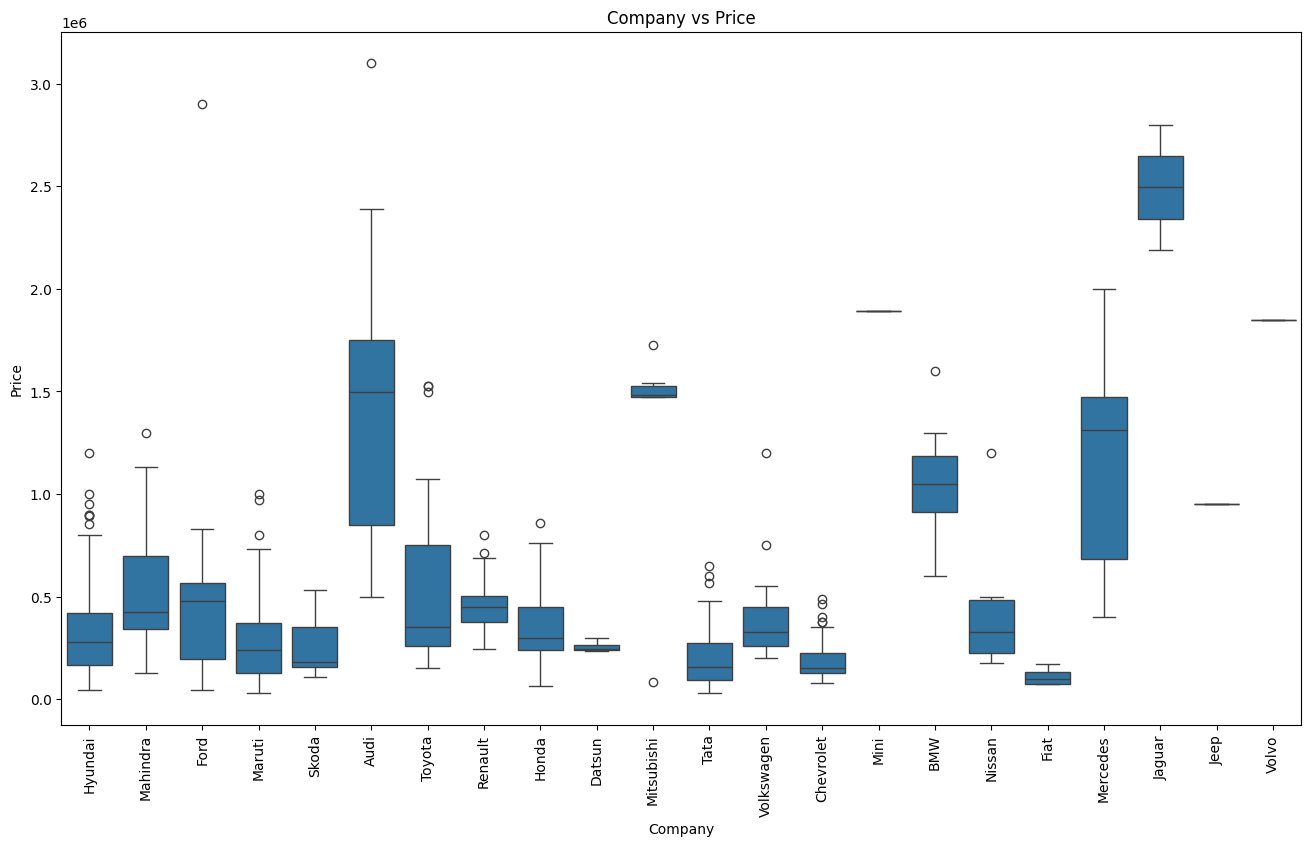

In [70]:
# company with price
sns.boxplot(x=df['company'], y=df['Price'])
plt.title("Company vs Price")
plt.xticks(rotation=90)
plt.xlabel("Company")
plt.ylabel("Price")

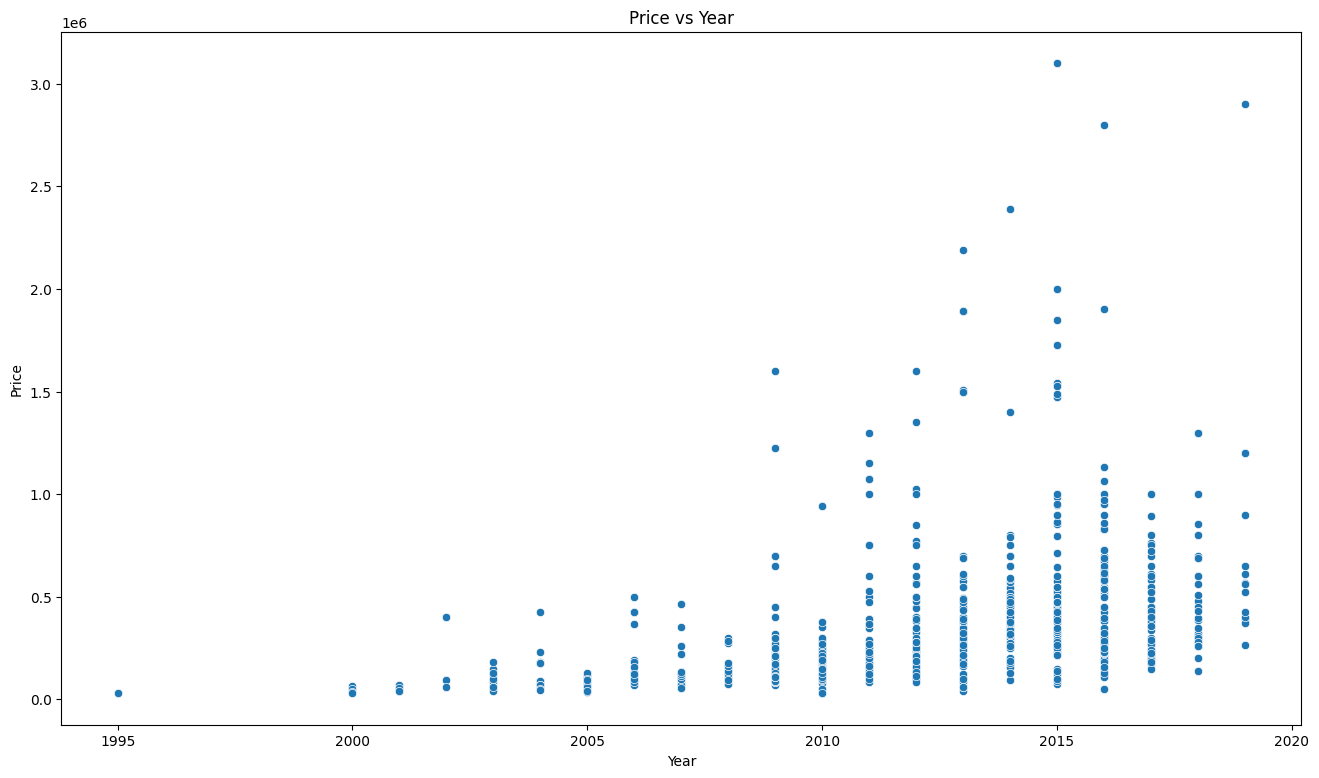

In [71]:
# price with year
sns.scatterplot(x=df['year'], y=df['Price'])
plt.title("Price vs Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

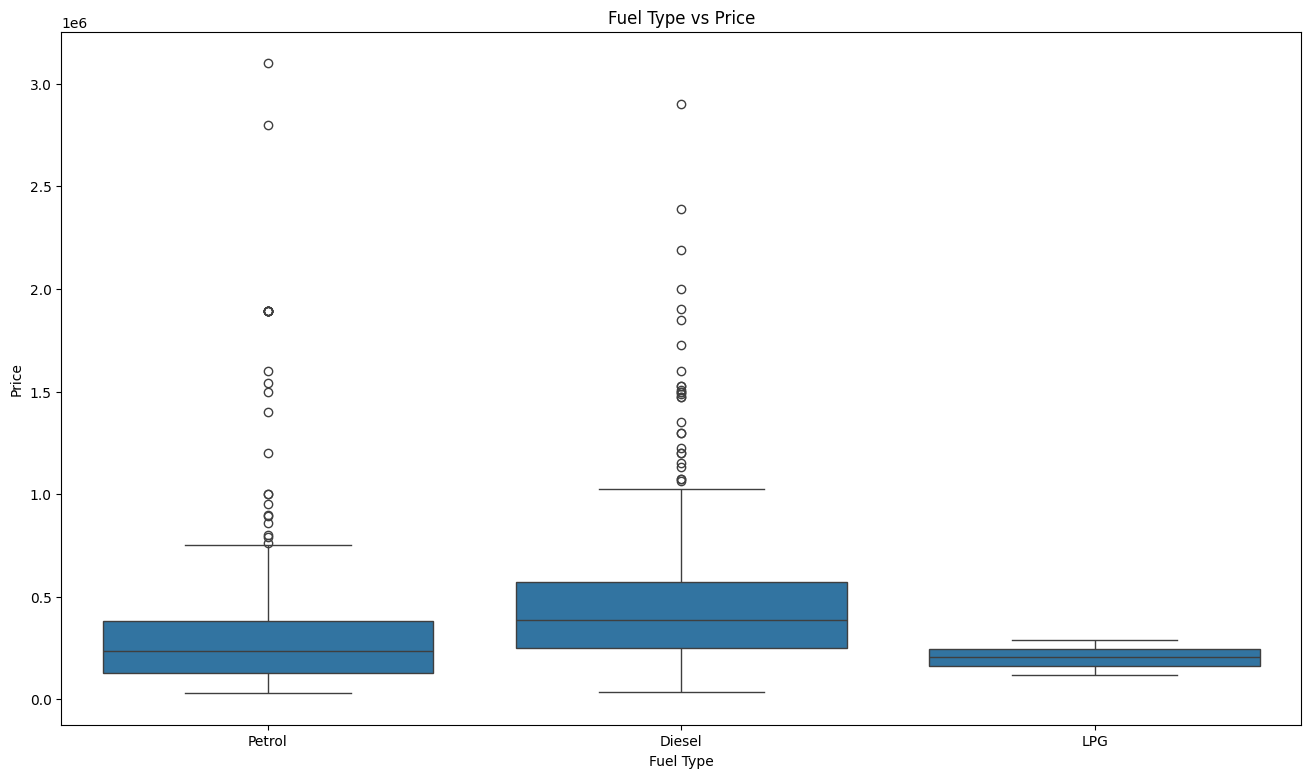

In [72]:
# relationship with price and fuel
sns.boxplot(x=df['fuel_type'], y=df['Price'])
plt.title("Fuel Type vs Price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

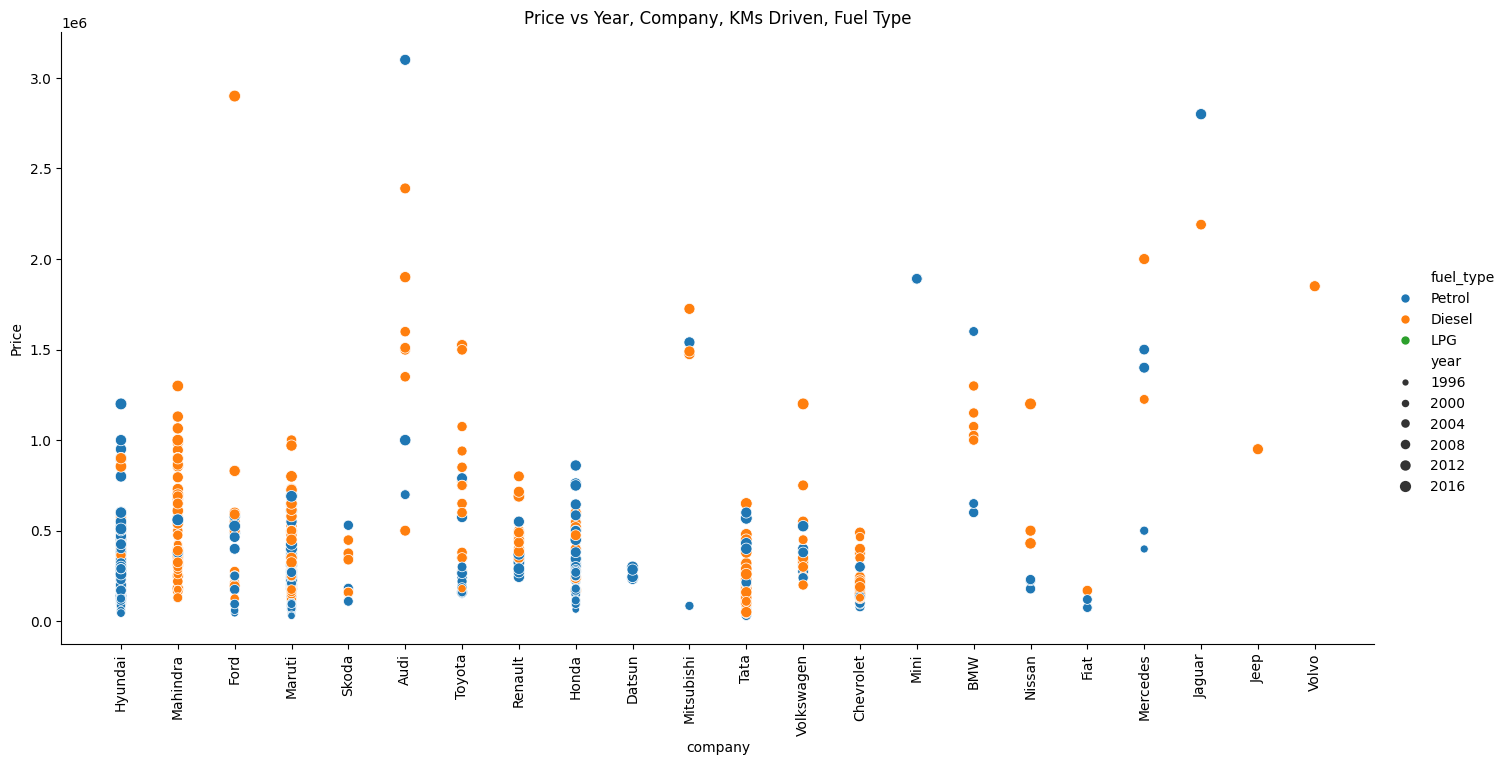

In [73]:
# Relationship of Price with FuelType, Year and Company mixed
sns.relplot(x='company',y='Price',data=df,hue='fuel_type',size='year',height=7,aspect=2)
plt.title("Price vs Year, Company, KMs Driven, Fuel Type")
plt.xticks(rotation=90)
plt.show()

In [74]:
# save cleaned data
# car.to_csv('Cleaned_Car_data.csv')

In [75]:
# creating ml model

In [76]:
# extracting training data
X = df.drop(columns='Price')
y = df['Price']

X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
802,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
803,Tata Indica V2,Tata,2009,30000,Diesel
804,Toyota Corolla Altis,Toyota,2009,132000,Petrol
805,Tata Zest XM,Tata,2018,27000,Diesel


In [77]:
# Define column transformer
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data and train the model
X_train_transformed = column_trans.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Make Predictions
X_test_transformed = column_trans.transform(X_test)
y_pred = model.predict(X_test_transformed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 123768.8782949512
Mean Squared Error: 57759583755.97573
R-squared: 0.5356169182349451


In [ ]:
# to check feature category after one hot encoding

# for i, feature_categories in enumerate(ohe.categories_):
#     print(f"Feature {i}: {feature_categories}")

In [78]:
# Example new car data (same format as the training data)
new_car_data = pd.DataFrame({
    'name': ['Hyundai Elite i20'],
    'company': ['Hyundai'],
    'year': [2015],
    'kms_driven': ['25,000 kms'],
    'fuel_type': ['Petrol']
})

# Preprocess the 'kms_driven' column (remove commas and convert to integer)
new_car_data['kms_driven'] = new_car_data['kms_driven'].str.replace(',', '').str.replace(' kms', '').astype(int)

# Apply the column transformer to the new data
new_car_data_transformed = column_trans.transform(new_car_data)

# Make the prediction using the trained model
predicted_price = model.predict(new_car_data_transformed)

# Print the predicted price
print(f"Predicted Price for the new car: {predicted_price}")

Predicted Price for the new car: [424728.43534803]
